# Setup

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [8]:
reddit_df = pd.read_csv('./data/combined_cleaned_500k.csv',  lineterminator='\n', encoding='utf8')

In [9]:
reddit_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r
0,i think most singaporeans dont give a damn who...,2020-04-11 15:49:23,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
1,fair point the secrecy aspect of it slipped my...,2020-04-03 09:59:08,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
2,range,2020-02-15 15:07:03,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
3,gt this is binary thinking because you think t...,2020-06-04 07:07:39,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
4,boo boo poor u lmao,2020-10-31 13:52:12,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."


In [12]:
# convert data to appropriate datatypes
reddit_df['text'] = reddit_df['text'].astype(str)
reddit_df['timestamp'] = pd.to_datetime(reddit_df['timestamp'])
reddit_df['username'] = reddit_df['username'].astype(str)
reddit_df['link'] = reddit_df['link'].astype(str)
reddit_df['link_id'] = reddit_df['link_id'].astype(str)
reddit_df['parent_id'] = reddit_df['parent_id'].astype(str)
reddit_df['id'] = reddit_df['id'].astype(str)
reddit_df['subreddit_id'] = reddit_df['subreddit_id'].astype(str)
reddit_df['moderation\r'] = reddit_df['moderation\r'].tolist()

In [13]:
# extract date from datetime stamp
reddit_df['timestamp'] = reddit_df['timestamp'].dt.date
reddit_df['timestamp'].head()

0    2020-04-11
1    2020-04-03
2    2020-02-15
3    2020-06-04
4    2020-10-31
Name: timestamp, dtype: object

# 1. Number of Comments across Time

In [15]:
# count number of comments per day
num_of_comments_per_day_df = reddit_df.groupby('timestamp')['id'].count()

In [21]:
num_of_comments_per_day_df.head()

timestamp
2020-01-01    128
2020-01-02    171
2020-01-03    195
2020-01-04    156
2020-01-05    180
Name: id, dtype: int64

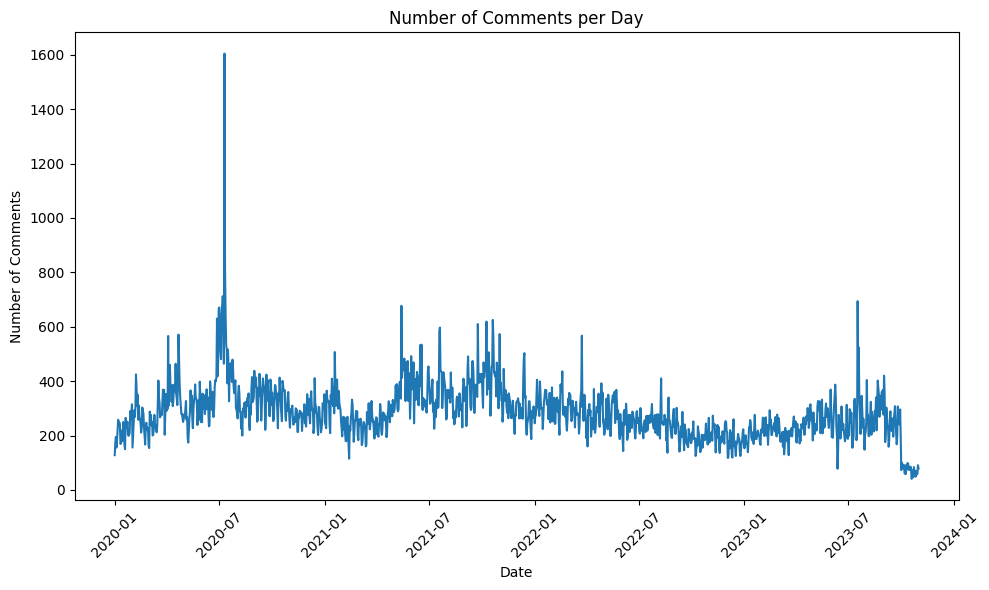

In [17]:
# plot number of comments against time
plt.figure(figsize=(10,6))
plt.plot(num_of_comments_per_day_df.index, num_of_comments_per_day_df.values)
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the Time-series plot, most days receive 200-450 comments. There seem to be 2 peaks: 1 in July 2020 and the other in July 2023. Let's take a closer look...

## Days with Most Number of Comments

In [24]:
# number of comments sorted in descending order
sorted_num_of_comments_per_day_df = num_of_comments_per_day_df.sort_values(ascending=False)

In [25]:
sorted_num_of_comments_per_day_df.head()

timestamp
2020-07-10    1604
2020-07-11     813
2020-07-07     712
2023-07-17     694
2020-07-06     680
Name: id, dtype: int64

From this table, we can pinpoint the 2 events surrounding the 2 peaks in the number of comments: 10 July 2020 is polling day, and 17 July 2023 was the news breaking out that Speaker Tan Chuan-Jin and Tampines GRC MP Cheng Li Hui resigned over an affair.

We can double-check if the reddit comments were indeed about those events.

### Check Polling Day

In [50]:
# filter date for 10 july 2020
polling_day_df = reddit_df[reddit_df['timestamp'] == datetime.date(2020, 7, 10)]

In [57]:
# expand resolution to see full text
pd.set_option('display.max_colwidth', None)

polling_day_df['text'].head(20)

83                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              they could technically retire an mp in a smc to trigger a by election
163                                                                                                                                                                                                                                                                                                                                                                                                                                    my sense as

The text data confirms that most of Reddit comments on Polling Day (10 July 2020) were about Polling Day and singaporean politics, including how it is affecting lives of Singaporeans.

### Check 17 July 2023

In [54]:
seventeen_july_twentytwentythree_df = reddit_df[reddit_df['timestamp'] == datetime.date(2023, 7, 17)]

In [56]:
seventeen_july_twentytwentythree_df['text'].head(20)

236840                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               idk if people call me low ses i love encik tan
236844                                                                                              

Again, the text data confirms that most of Reddit comments on 17 July 2023 were about Speaker Tan Chuan-Jin and Tampines GRC MP Cheng Li Hui's affair in light of the news of their resignations.

# 2. Check for Yearly Patterns

In [71]:
pd.reset_option('display.max_colwidth')
reddit_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r
0,i think most singaporeans dont give a damn who...,2020-04-11,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
1,fair point the secrecy aspect of it slipped my...,2020-04-03,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
2,range,2020-02-15,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
3,gt this is binary thinking because you think t...,2020-06-04,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
4,boo boo poor u lmao,2020-10-31,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."


In [68]:
reddit_df_2 = reddit_df.copy()

In [70]:
print(reddit_df_2['text'].dtype)

object


In [72]:
#ensure timestamp column is datetime object
reddit_df_2['timestamp'] = pd.to_datetime(reddit_df_2['timestamp'])

# create 2 new columns in reddit_df
reddit_df_2['year'] = reddit_df_2['timestamp'].dt.year
reddit_df_2['month'] = reddit_df_2['timestamp'].dt.month

In [73]:
reddit_df_2.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation\r,year,month
0,i think most singaporeans dont give a damn who...,2020-04-11,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,4
1,fair point the secrecy aspect of it slipped my...,2020-04-03,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,4
2,range,2020-02-15,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,2
3,gt this is binary thinking because you think t...,2020-06-04,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,6
4,boo boo poor u lmao,2020-10-31,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020,10


In [74]:
# count number of comments by year and month 
num_of_comments_per_month_by_year_df = reddit_df_2.groupby(['year', 'month'])['id'].count().reset_index()

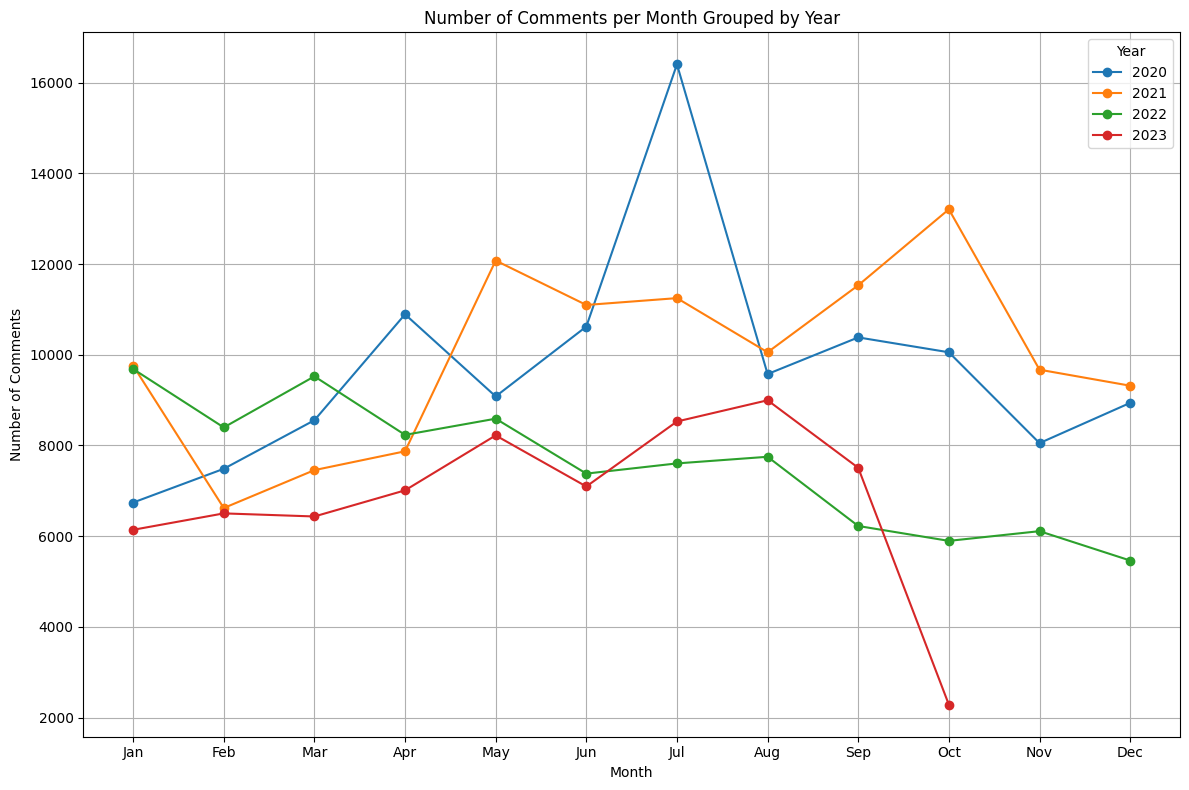

In [75]:
# Plotting
plt.figure(figsize=(12, 8))

# Loop through each year and plot number of comments per month
for year in num_of_comments_per_month_by_year_df['year'].unique():
    data_by_year = num_of_comments_per_month_by_year_df[num_of_comments_per_month_by_year_df['year'] == year]
    plt.plot(data_by_year['month'], data_by_year['id'], marker='o', label=str(year))

# Customizing the plot
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Month Grouped by Year')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

The Time-series plot grouped by year and month above shows that there is not much of a seasonal pattern for when people post Reddit comments, but are more driven by events in Singapore, especially political events.

We can see a more obvious peak in October 2021. Let's take a closer look...

In [76]:
# filter comments posted in October 2021
october_twentytwentyone_df = reddit_df_2[(reddit_df_2['timestamp'] >= '2021-10-01') & (reddit_df_2['timestamp'] <= '2021-10-31')]

In [93]:
# count number of comments per day in the month of October 2021
num_of_comments_per_day_in_october_twentytwentyone_df = october_twentytwentyone_df.groupby('timestamp')['id'].count()

# sort days based on number of comments
num_of_comments_per_day_in_october_twentytwentyone_df.sort_values(ascending=False).head()

timestamp
2021-10-20    625
2021-10-09    619
2021-10-21    562
2021-10-13    506
2021-10-04    469
Name: id, dtype: int64

We see that 20 October has the most comments in October 2021. We researched online and found that this coincided with a Press Release by the COVID-19 task force of the extension of COVID-19 restrictions under the "stabilisation phase". Read here for more information: https://www.channelnewsasia.com/singapore/stabilisation-phase-restrictions-extended-nov-21-dining-social-gatherings-2256766.

In [96]:
reddit_df_2['timestamp'] = reddit_df_2['timestamp'].dt.date

# filter comments posted on 20 October 2021
twenty_october_twentytwentyone_df = reddit_df_2[reddit_df_2['timestamp'] == datetime.date(2021, 10, 20)]

We take a closer look at the comments themselves to confirm our suspicions...

In [98]:
twenty_october_twentytwentyone_df['text'].head(20)

2927                                                                                                                                                                            spitting facts but its wasted on fools here \n\nsincerely though do what you can quit when you have to you dont owe this country and its people any more sg society can go to hell in a handbasket for all any of us care the difference is you and your family members who are hcws will definitely be welcome to emigrate anywhere in the world and get paidtreated better than sg
3833                                                                                                                                                                                                                                                                                                                                                                                                                                                               

By analysing the comments of this day. we can see some comments about the COVID-19 restrictions, though not as prevalent as compared to the first 2 events.

Other miscellaneous comments that can be found here are about relationship issues and public transport.

# Conclusion

These Time-series plots show that there Reddit comments are more driven by events in Singapore, especially political events and events that affect Singaporeans' way of life.